# Welcome to My notebook

#### <span style="color: green;">This notebook will contain Time series forecasting of Pakistan exports data. I have collected data from State Bank of Pakistan. The data contains exports of Pakistan from 2005-2024 to various countries. I will use this data for predicting exports of Pakistan in the upcoming 5 years to each country.</span>

### <span style="color: green;">
 Steps I will Follow 
1. Data cleaning to make it more standardized.  
2. Exploratory Data Analysis.  
3. Model development.
4. Model Validation and accuracy Calculation 

</span>


  


In [1]:
!pip install pandas numpy matplotlib seaborn prophet

# Importing libraries
### <span style="color: green;"> we will use pandas numpy seaborn and prophet for various operations </span>


In [2]:
import pandas as pd 
import seaborn as sns
from prophet import Prophet
from datetime import datetime
df= pd.read_csv('dataset.csv')
print (df)

                           Dataset Name Observation Date  \
0      Export Receipts by all Countries      31-Dec-2024   
1      Export Receipts by all Countries      31-Dec-2024   
2      Export Receipts by all Countries      31-Dec-2024   
3      Export Receipts by all Countries      31-Dec-2024   
4      Export Receipts by all Countries      31-Dec-2024   
...                                 ...              ...   
56755  Export Receipts by all Countries      31-Jul-2003   
56756  Export Receipts by all Countries      31-Jul-2003   
56757  Export Receipts by all Countries      31-Jul-2003   
56758  Export Receipts by all Countries      31-Jul-2003   
56759  Export Receipts by all Countries      31-Jul-2003   

                          Series Key                     Series Display Name  \
0      TS_GP_BOP_XRECCOU_M.EXPC00010                           . Afghanistan   
1      TS_GP_BOP_XRECCOU_M.EXPC00020                               . Albania   
2      TS_GP_BOP_XRECCOU_M.EXPC00030   

## Data Analysis 
### <span style="color: green;"> In upcoming we will analyze our data and our main focus will be data cleaning handling null and duplicated values  </span>

In [3]:
# Printing first 5 rows of dataset
df.head()


,Dataset Name,Observation Date,Series Key,Series Display Name,Observation Value,Unit,Observation Status,Observation Status Comment,Sequence No.,Series name
0,Export Receipts by all Countries,31-Dec-2024,TS_GP_BOP_XRECCOU_M.EXPC00010,. Afghanistan,97633.9492,Thousand USD,Normal,NaN,10,Export receipts of Goods from Afghanistan
1,Export Receipts by all Countries,31-Dec-2024,TS_GP_BOP_XRECCOU_M.EXPC00020,. Albania,884.3530,Thousand USD,Normal,NaN,20,Export receipts of Goods from Albania
2,Export Receipts by all Countries,31-Dec-2024,TS_GP_BOP_XRECCOU_M.EXPC00030,. Algeria,986.9037,Thousand USD,Normal,NaN,30,Export receipts of Goods from Algeria
3,Export Receipts by all Countries,31-Dec-2024,TS_GP_BOP_XRECCOU_M.EXPC00040,. American Samoa,0.0000,Thousand USD,Normal,NaN,40,Export receipts of Goods from American Samoa
4,Export Receipts by all Countries,31-Dec-2024,TS_GP_BOP_XRECCOU_M.EXPC00050,. Andorra,0.0000,Thousand USD,Normal,NaN,50,Export receipts of Goods from Andorra


In [4]:
#printing last 5 rows of dataset 
df.tail()

,Dataset Name,Observation Date,Series Key,Series Display Name,Observation Value,Unit,Observation Status,Observation Status Comment,Sequence No.,Series name
56755,Export Receipts by all Countries,31-Jul-2003,TS_GP_BOP_XRECCOU_M.EXPC02160,I Export Receipts through Banks,992464.56,Thousand USD,Normal,NaN,2160,Export Receipts through Banks
56756,Export Receipts by all Countries,31-Jul-2003,TS_GP_BOP_XRECCOU_M.EXPC02170,II Freight on Export,39400.00,Thousand USD,Normal,NaN,2170,Freight on Export has been calculated through ...
56757,Export Receipts by all Countries,31-Jul-2003,TS_GP_BOP_XRECCOU_M.EXPC02180,III Export Receipts Banks (fob) (I-II),953064.56,Thousand USD,Normal,NaN,2180,Export Receipts Banks (fob)
56758,Export Receipts by all Countries,31-Jul-2003,TS_GP_BOP_XRECCOU_M.EXPC02190,IV Other Exports,35935.44,Thousand USD,Normal,NaN,2190,"Other exports includes land borne export, expo..."
56759,Export Receipts by all Countries,31-Jul-2003,TS_GP_BOP_XRECCOU_M.EXPC02200,V Total Export as per BOP (III+IV),989000.00,Thousand USD,Normal,NaN,2200,Total Export as per BOP


In [5]:
# Check for datatypes and all info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Dataset Name                56760 non-null  object 
 1   Observation Date            56760 non-null  object 
 2   Series Key                  56760 non-null  object 
 3   Series Display Name         56760 non-null  object 
 4   Observation Value           56758 non-null  float64
 5   Unit                        56760 non-null  object 
 6   Observation Status          56760 non-null  object 
 7   Observation Status Comment  0 non-null      float64
 8   Sequence No.                56760 non-null  int64  
 9   Series name                 56760 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [6]:
# Statistical values 
# we are getting negative values for exports we will exclude it because i have confirmed from dataset 
# these negative values indicate those exports values  which were refunded by overall countries this value doesn't contribute 
# Doesn't contribute much to our analysis we will exclude these values and will fill it with 0 so it doesn't interrupt our analysis
df.describe()

,Observation Value,Observation Status Comment,Sequence No.
count,5.675800e+04,0.0,56760.00000
mean,3.447821e+04,NaN,1105.00000
std,2.242973e+05,NaN,635.08433
min,-1.945474e+05,NaN,10.00000
25%,3.910000e+01,NaN,557.50000
50%,5.265875e+02,NaN,1105.00000
75%,4.701852e+03,NaN,1652.50000
max,3.152008e+06,NaN,2200.00000


In [62]:
# In data set min value is -1.94547 i have confirmed this value indicates the exports value which we have returned
# to other countries it is not much important we will exclude 

negative_values_count = (df['Observation Value'] < 0).sum()
print(f'Number of negative values: {negative_values_count}')

df['Observation Value'] = df['Observation Value'].apply(lambda x: max(x, 0))


print(df['Observation Value'].describe())

Number of negative values: 41
count    5.675800e+04
mean     3.451639e+04
std      2.242839e+05
min      0.000000e+00
25%      3.910000e+01
50%      5.265875e+02
75%      4.701852e+03
max      3.152008e+06
Name: Observation Value, dtype: float64


# Handling Null Values
## <span style="color: green;">It is very important to handle all these null values as our model will struugle if our dataset is containing Null values .</span>

In [7]:
# There are some null values in observation value which we will handle after verifying it 
# In observation status we have many null values but we can exclude this column as it is not contributing to our prediction
print(df.isnull().sum())

Dataset Name                      0
Observation Date                  0
Series Key                        0
Series Display Name               0
Observation Value                 2
Unit                              0
Observation Status                0
Observation Status Comment    56760
Sequence No.                      0
Series name                       0
dtype: int64


In [8]:
# Checking for duplicated values 
print(df.duplicated().sum())

0


### Observation Date, Seri Display Name and Observation values are the main column which we will use for our model training and further EDA process 

In [9]:
# Keeping only the main feature from dataset
df1 = df[['Observation Date', 'Series Display Name', 'Observation Value']]

In [10]:
print(df1.isnull().sum())

Observation Date       0
Series Display Name    0
Observation Value      2
dtype: int64


In [11]:
df1.fillna(0, inplace=True)


C:\Users\dell\AppData\Local\Temp\ipykernel_19368\295286115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.fillna(0, inplace=True)


In [12]:
print(df1.isnull().sum())

Observation Date       0
Series Display Name    0
Observation Value      0
dtype: int64


In [13]:
df1.head()

,Observation Date,Series Display Name,Observation Value
0,31-Dec-2024,. Afghanistan,97633.9492
1,31-Dec-2024,. Albania,884.3530
2,31-Dec-2024,. Algeria,986.9037
3,31-Dec-2024,. American Samoa,0.0000
4,31-Dec-2024,. Andorra,0.0000


In [14]:
# In each country Starting there is'.' infront of it we will cleannit for better visualization of countries name 
df['Series Display Name'] = df['Series Display Name'].str.lstrip('.')

# Select the necessary columns
df1 = df[['Observation Date', 'Series Display Name', 'Observation Value']]

print(df1)

      Observation Date                     Series Display Name  \
0          31-Dec-2024                             Afghanistan   
1          31-Dec-2024                                 Albania   
2          31-Dec-2024                                 Algeria   
3          31-Dec-2024                          American Samoa   
4          31-Dec-2024                                 Andorra   
...                ...                                     ...   
56755      31-Jul-2003         I Export Receipts through Banks   
56756      31-Jul-2003                    II Freight on Export   
56757      31-Jul-2003  III Export Receipts Banks (fob) (I-II)   
56758      31-Jul-2003                        IV Other Exports   
56759      31-Jul-2003      V Total Export as per BOP (III+IV)   

       Observation Value  
0             97633.9492  
1               884.3530  
2               986.9037  
3                 0.0000  
4                 0.0000  
...                  ...  
56755        99246

In [15]:
# Changing date to apprporiate format because in upcoming step our model will use this date for forecasting

df1['Observation Date'] = pd.to_datetime(df1['Observation Date'], format='%d-%b-%Y')
print(df1)

      Observation Date                     Series Display Name  \
0           2024-12-31                             Afghanistan   
1           2024-12-31                                 Albania   
2           2024-12-31                                 Algeria   
3           2024-12-31                          American Samoa   
4           2024-12-31                                 Andorra   
...                ...                                     ...   
56755       2003-07-31         I Export Receipts through Banks   
56756       2003-07-31                    II Freight on Export   
56757       2003-07-31  III Export Receipts Banks (fob) (I-II)   
56758       2003-07-31                        IV Other Exports   
56759       2003-07-31      V Total Export as per BOP (III+IV)   

       Observation Value  
0             97633.9492  
1               884.3530  
2               986.9037  
3                 0.0000  
4                 0.0000  
...                  ...  
56755        99246

C:\Users\dell\AppData\Local\Temp\ipykernel_19368\814001142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Observation Date'] = pd.to_datetime(df1['Observation Date'], format='%d-%b-%Y')


In [16]:
# List of aggregated categories to exclude these were excluded as we just want to predict top_10 countries banks are excluded
aggregated_categories = [
    'V Total Export as per BOP (III+IV)',
    'I Export Receipts through Banks',
    'III Export Receipts Banks (fob) (I-II)',
    'IV Other Exports',
    'II Freight on Export'
]

# Filter out aggregated categories
df_country_exports = df1[~df1['Series Display Name'].isin(aggregated_categories)]

# Verify the filtered dataset
print(df_country_exports['Series Display Name'].unique())

[' Afghanistan' ' Albania' ' Algeria' ' American Samoa' ' Andorra'
 ' Angola' ' Antigua & Barbuda' ' Argentina' ' Armenia' ' Aruba'
 ' Australia' ' Austria' ' Azerbaijan' ' Bahamas' ' Bahrain' ' Bangladesh'
 ' Barbados' ' Belarus' ' Belgium' ' Belize' ' Benin ( Dahomey )'
 ' Bermuda' ' Bhutan' ' Bolivia' ' Bosnia Herzegovina' ' Botswana'
 ' Brazil' ' Brunei' ' Bulgaria' ' Burkina Faso ( Upper Volta)' ' Burundi'
 ' Cambodia Kampuchea' ' Cameroon' ' Canada' ' Cape Verde'
 ' Cayman Islands' ' Central African Republic' ' Chad' ' Chile' ' China'
 ' Colombia' ' Comoros' ' Congo' ' Costa Rica' ' Croatia' ' Cuba'
 ' Cyprus' ' Czech Republic' ' Denmark' ' Djibouti' ' Dominica'
 ' Dominican Republic' ' Ecuador' ' Egypt' ' El Salvador'
 ' Equatorial Guinea' ' Eritrea' ' Estonia' ' Ethiopia' ' Faeroe Islands'
 ' Falkland Islands' ' Fiji' ' Finland' ' France' ' French Guinea'
 ' Gabon' ' Gambia' ' Georgia' ' Germany' ' Ghana' ' Gibraltar' ' Greece'
 ' Greenland' ' Grenada' ' Guadeloupe' ' Guam' ' G

In [17]:
# Getting Top_10 countries with their overall exports over the years 

top_20_countries = (
    df_country_exports.groupby('Series Display Name')['Observation Value']
    .sum()
    .sort_values(ascending=False)
    .astype(int)  
    .head(10)  # Get the top 10 countries
)
top_20_countries_million = top_20_countries / 1_000_000 
# Print the result
print(top_20_countries_million)

Series Display Name
 U. S. A.                 89.604073
 China                    35.133451
 U. K.                    31.933817
 U. A. E. Dubai           25.779310
 Germany                  24.565486
 Afghanistan              22.167015
 Italy                    15.725929
 Spain                    15.670353
 Netherlands (Holland)    14.915880
 Bangladesh               12.479214
Name: Observation Value, dtype: float64


# EDA and Visualization 
### <span style="color: green;"> After Data cleaning and formatting the data now we will explore and visualize our data so to get better understand of our country exports to various countries </span>

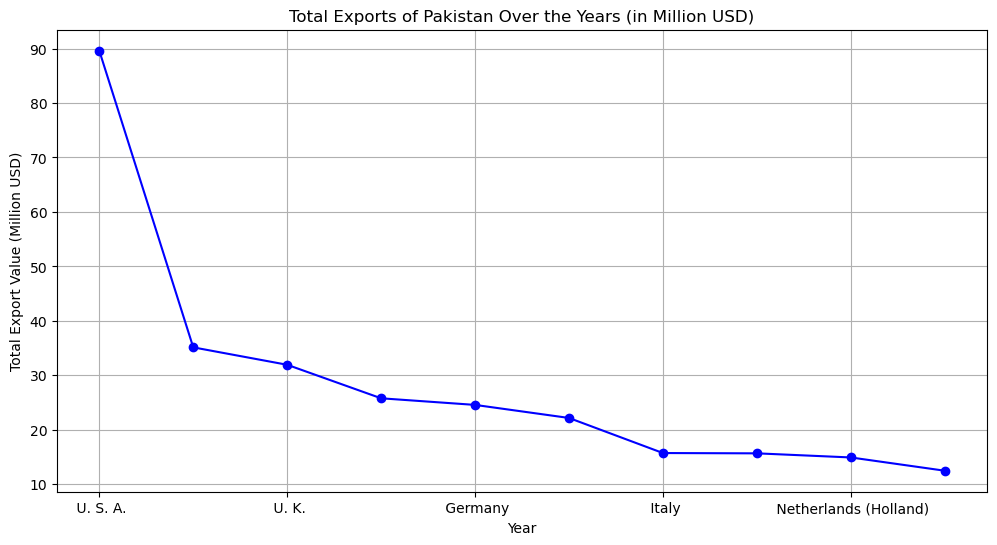

In [69]:
# Visualizing Total Exports of pakistan to various countries in Million USd

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
top_20_countries_million.plot(kind='line', marker='o', color='b')
plt.title('Total Exports of Pakistan Over the Years (in Million USD)')
plt.xlabel('Year')
plt.ylabel('Total Export Value (Million USD)')
plt.grid(True)
plt.show()


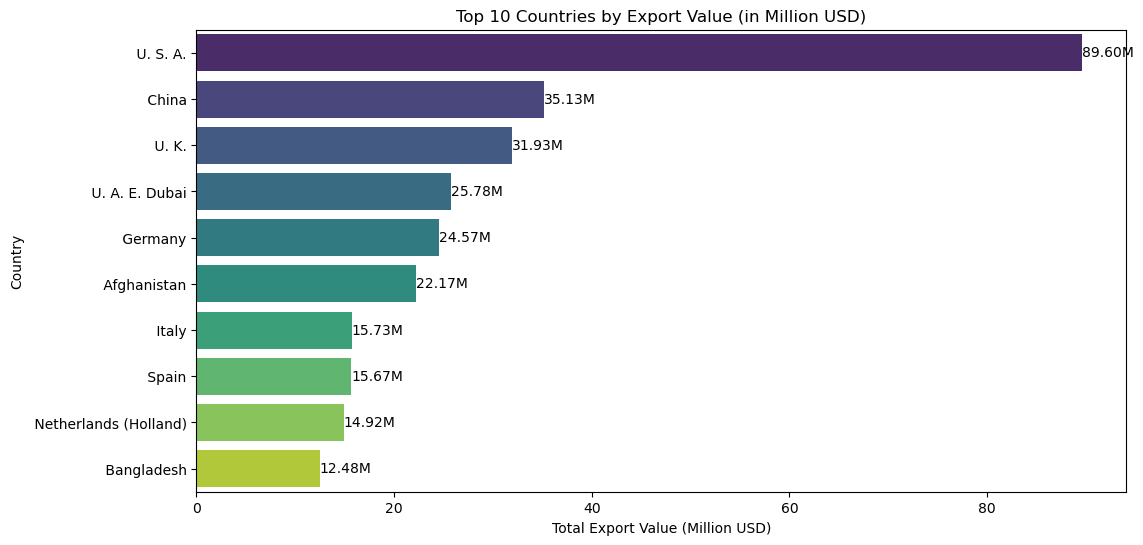

In [19]:
import seaborn as sns

plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_20_countries_million.values, y=top_20_countries_million.index, palette="viridis")
plt.title("Top 10 Countries by Export Value (in Million USD)")
plt.xlabel("Total Export Value (Million USD)")
plt.ylabel("Country")

# Add value labels
for i, value in enumerate(top_20_countries_million.values):
    ax.text(value, i, f'{value:.2f}M', va='center')

plt.show()


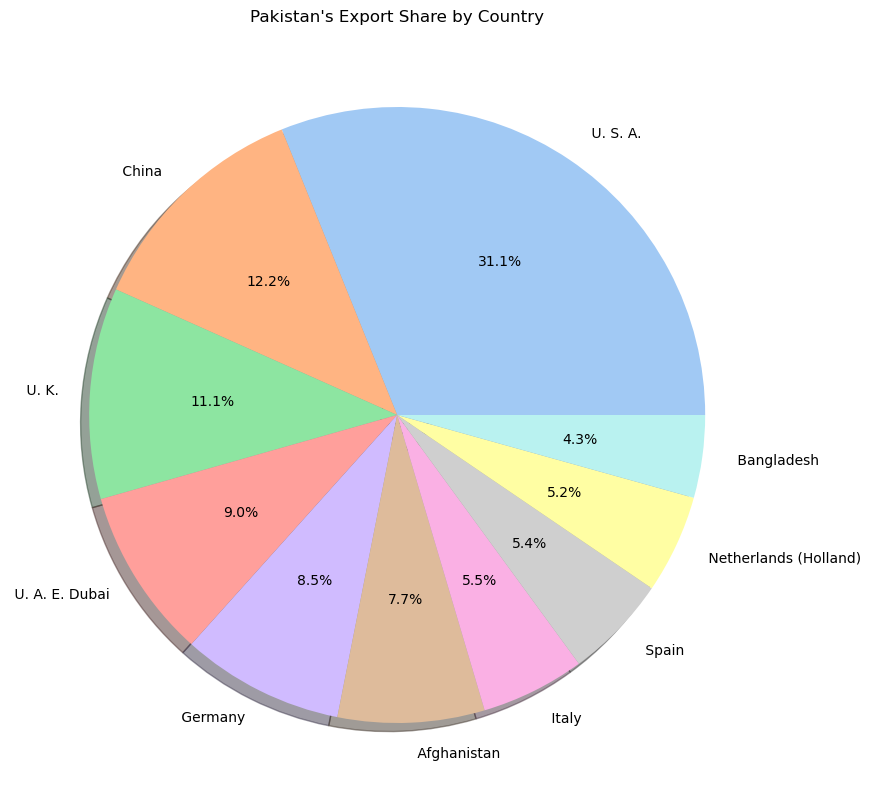

In [70]:
# Visualizing Pakistan export share by various country
explode = [0.1 if country in ['China', 'U.S.A.'] else 0 for country in top_20_countries.index]

plt.figure(figsize=(10,10))
plt.pie(top_20_countries.values, labels=top_20_countries.index, autopct='%1.1f%%', 
        colors=sns.color_palette('pastel'), explode=explode, shadow=True)
plt.title("Pakistan's Export Share by Country")
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_19368\1877733720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_exports['Month'] = df_country_exports['Observation Date'].dt.month
C:\Users\dell\AppData\Local\Temp\ipykernel_19368\1877733720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_exports['Observation Value (Million USD)'] = df_country_exports['Observation Value'] / 1_000_000


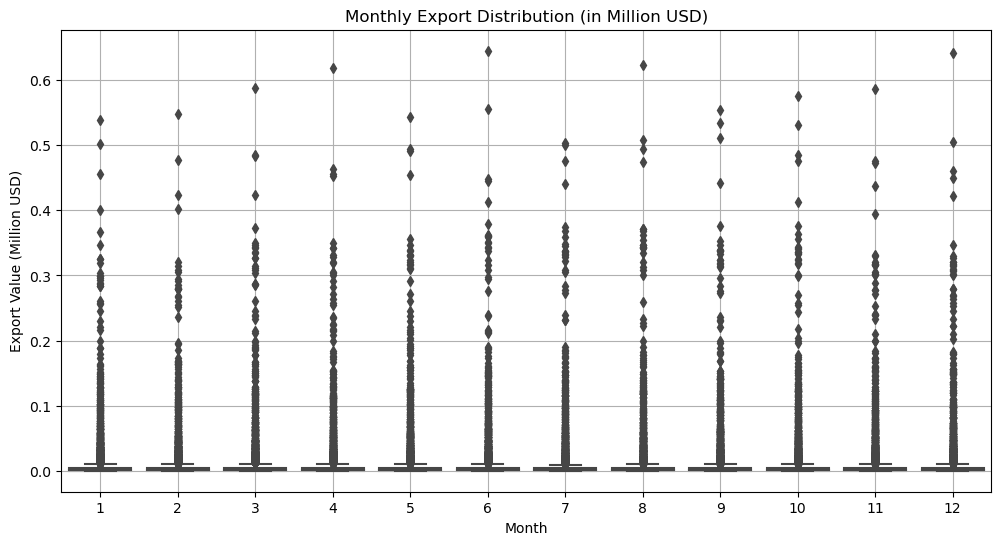

In [73]:
#Checking for monthly patterns as our model are well suited for seasonal data and in this graph we will check outliers


df_country_exports['Month'] = df_country_exports['Observation Date'].dt.month
df_country_exports['Observation Value (Million USD)'] = df_country_exports['Observation Value'] / 1_000_000

plt.figure(figsize=(12,6))
sns.boxplot(x=df_country_exports['Month'], y=df_country_exports['Observation Value (Million USD)'])
plt.title('Monthly Export Distribution (in Million USD)')
plt.xlabel('Month')
plt.ylabel('Export Value (Million USD)')
plt.grid(True)
plt.show()

In [50]:
# HAndling Outliers in our data as we have outliers in our data we will normalize those values by taking upper and lower bound 
Q1 = df_country_exports['Observation Value (Million USD)'].quantile(0.25)
Q3 = df_country_exports['Observation Value (Million USD)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_country_exports_filtered = df_country_exports[(df_country_exports['Observation Value (Million USD)'] >= lower_bound) & 
                                                 (df_country_exports['Observation Value (Million USD)'] <= upper_bound)]


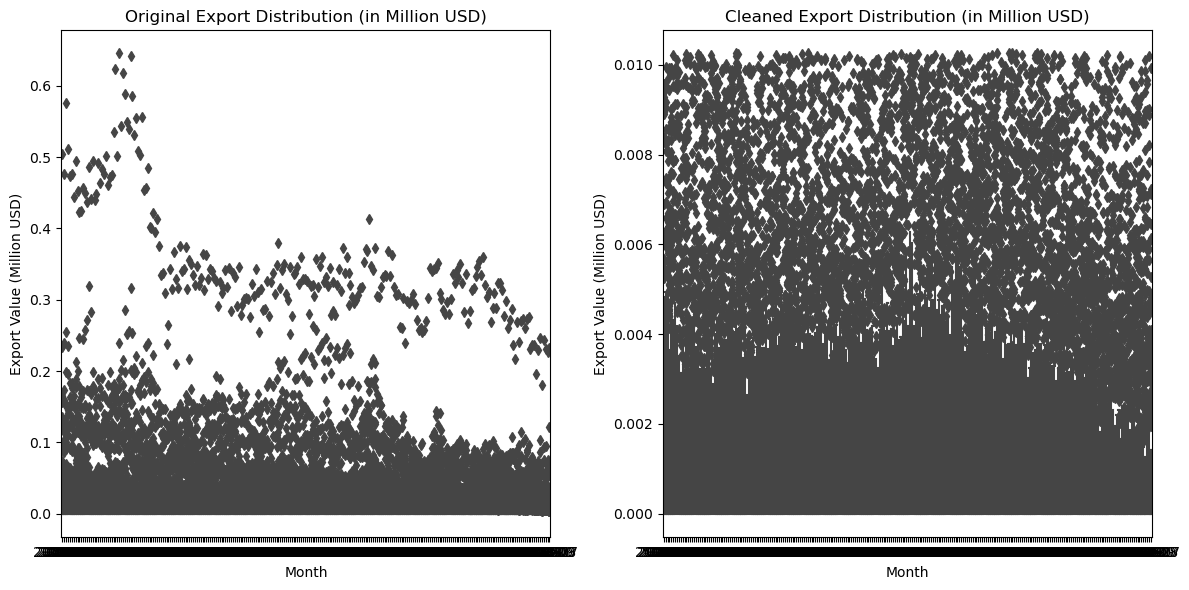

In [55]:
# After outliers our monthly exports will look like this 
# Plotting before and after removing outliers
plt.figure(figsize=(12,6))

# Original data
plt.subplot(1, 2, 1)
sns.boxplot(x=df_country_exports['Month'], y=df_country_exports['Observation Value (Million USD)'])
plt.title('Original Export Distribution (in Million USD)')
plt.xlabel('Month')
plt.ylabel('Export Value (Million USD)')

# Cleaned data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_country_exports_filtered['Month'], y=df_country_exports_filtered['Observation Value (Million USD)'])
plt.title('Cleaned Export Distribution (in Million USD)')
plt.xlabel('Month')
plt.ylabel('Export Value (Million USD)')

plt.tight_layout()
plt.show()


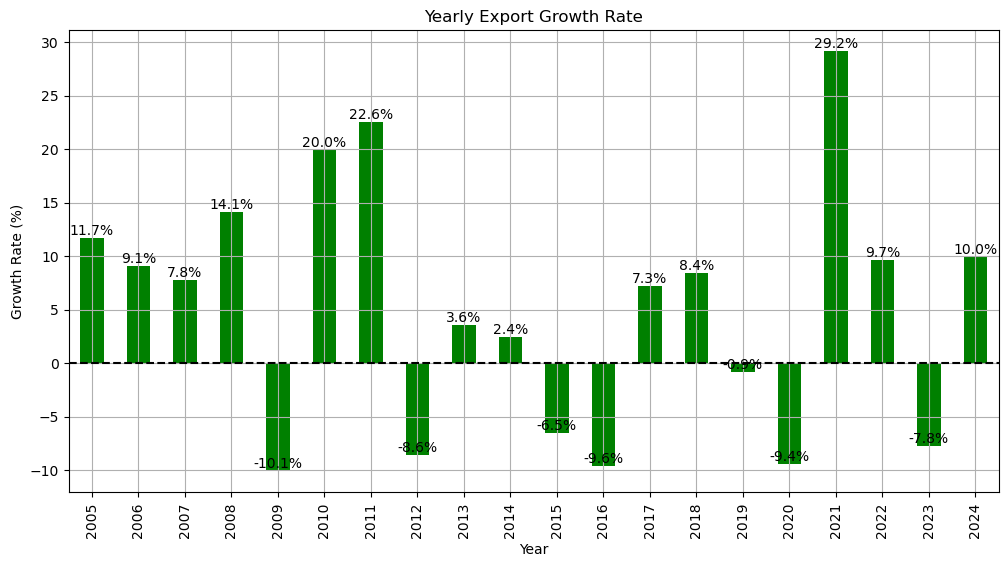

In [74]:
# This figure is very important to check yearly exports growth rate compared to previous year


plt.figure(figsize=(12, 6))
ax = df_yearly_exports_pct.plot(kind='bar', color='g')
plt.title('Yearly Export Growth Rate')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.axhline(0, color='black', linestyle='--')
plt.grid(True)

# Add value labels
for i, value in enumerate(df_yearly_exports_pct):
    ax.text(i, value, f'{value:.1f}%', ha='center', va='bottom')



plt.show()

# Model Development 
### I will use facebook Prophet Model for time series forecasting because 
### Why Choose Prophet?

1. Handles Seasonality & Holidays:
    Perfect for time series with seasonality and holiday effects (e.g., export data with yearly patterns).

2. Ease of Use:
   Simple to implement with minimal tuning, suitable for users without deep forecasting experience.

3. Works with Missing Data:
   Can handle missing values and still provide accurate forecasts.



### Why Not Other Models?

1. ARIMA:
   Requires stationary data and manual hyperparameter tuning, making it more complex.





4. XGBoost:
   Needs **feature engineering** and may be overkill for simple time series tasks.

5. SARIMA:
   - Similar to ARIMA but more complex, requiring careful tuning.

---

### Summary:
**Prophet** is a great choice for export data forecasting due to its **simplicity**, **seasonality handling**, and **robustness to missing data and outliers**. It's easier to use compared to ARIMA, LSTM, or XGBoost, which require more effort and data.


## What is prophet model what is basic structure of it?
### Prophet model is supervised learning algorithm it is developed by facebook for time series forecasting here is formula of prophet 
#   y(t) = g(t) + s(t) + h(t) + ε
### Explanation of Terms:
- `y(t)`: The observed value of the time series at time `t`.
- `g(t)`: The **trend component** that captures the overall direction (growth or decline) of the data over time.
- `s(t)`: The **seasonality component** that models periodic fluctuations, such as weekly, daily, or yearly patterns.
- `h(t)`: The **holiday component** that accounts for the effects of holidays or special events that influence the data.
- `ε`: The **noise term** that represents random variations or errors that cannot be explained by the model.


In [23]:
!pip install prophet


In [43]:
# Filter top 10 countries
top_10_countries = (
    df_country_exports.groupby('Series Display Name')['Observation Value']
    .sum()
    .sort_values(ascending=False)
    .head(10)  # Get the top 10 countries
)

top_10_countries_million = top_10_countries / 1_000_000  # Convert to million USD
top_10_countries_list = top_10_countries.index.tolist()  # List of top 10 countries


In [44]:
# Filter data for the top 10 countries and aggregate by month
df_country_exports['Month'] = df_country_exports['Observation Date'].dt.to_period('M')

df_top_10_data = df_country_exports[df_country_exports['Series Display Name'].isin(top_10_countries_list)]
df_top_10_data['Observation Value (Million USD)'] = df_top_10_data['Observation Value'] / 1_000_000

# Aggregating the data by month and country
df_monthly_exports = df_top_10_data.groupby(['Series Display Name', 'Month'])['Observation Value (Million USD)'].sum().reset_index()

# Format the data for Prophet
df_monthly_exports.rename(columns={'Month': 'ds', 'Observation Value (Million USD)': 'y'}, inplace=True)


C:\Users\dell\AppData\Local\Temp\ipykernel_19368\89564211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_exports['Month'] = df_country_exports['Observation Date'].dt.to_period('M')
C:\Users\dell\AppData\Local\Temp\ipykernel_19368\89564211.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10_data['Observation Value (Million USD)'] = df_top_10_data['Observation Value'] / 1_000_000


##  stepwise explanation of below cell
# Export Forecasts for Top 10 Countries

This code uses **Prophet** to forecast exports for the top 10 countries over the next 5 years. The results are visualized in a 5x2 subplot dashboard.

## Steps:
1. **Data Preprocessing**: 
   Convert date column to `datetime` format.
    Filter data for each country.

2. **Modeling**:
   Fit the **Prophet** model to historical export data.
    Generate forecasts for the next 5 years (60 months).

3. **Plotting**:
   Plot forecasts on individual subplots for each country.
   Format the x-axis for better readability.
   Remove uncertainty intervals and add vertical lines to separate historical and forecasted data.

4. **Display**:
    Adjust layout to prevent label overlap.
   Show the final plot.

This creates a dashboard to compare export forecasts for the top 10 countries.


01:26:08 - cmdstanpy - INFO - Chain [1] start processing
01:26:08 - cmdstanpy - INFO - Chain [1] done processing
01:26:10 - cmdstanpy - INFO - Chain [1] start processing
01:26:10 - cmdstanpy - INFO - Chain [1] done processing
01:26:11 - cmdstanpy - INFO - Chain [1] start processing
01:26:11 - cmdstanpy - INFO - Chain [1] done processing
01:26:12 - cmdstanpy - INFO - Chain [1] start processing
01:26:12 - cmdstanpy - INFO - Chain [1] done processing
01:26:13 - cmdstanpy - INFO - Chain [1] start processing
01:26:13 - cmdstanpy - INFO - Chain [1] done processing
01:26:14 - cmdstanpy - INFO - Chain [1] start processing
01:26:14 - cmdstanpy - INFO - Chain [1] done processing
01:26:15 - cmdstanpy - INFO - Chain [1] start processing
01:26:15 - cmdstanpy - INFO - Chain [1] done processing
01:26:15 - cmdstanpy - INFO - Chain [1] start processing
01:26:15 - cmdstanpy - INFO - Chain [1] done processing
01:26:16 - cmdstanpy - INFO - Chain [1] start processing
01:26:17 - cmdstanpy - INFO - Chain [1]

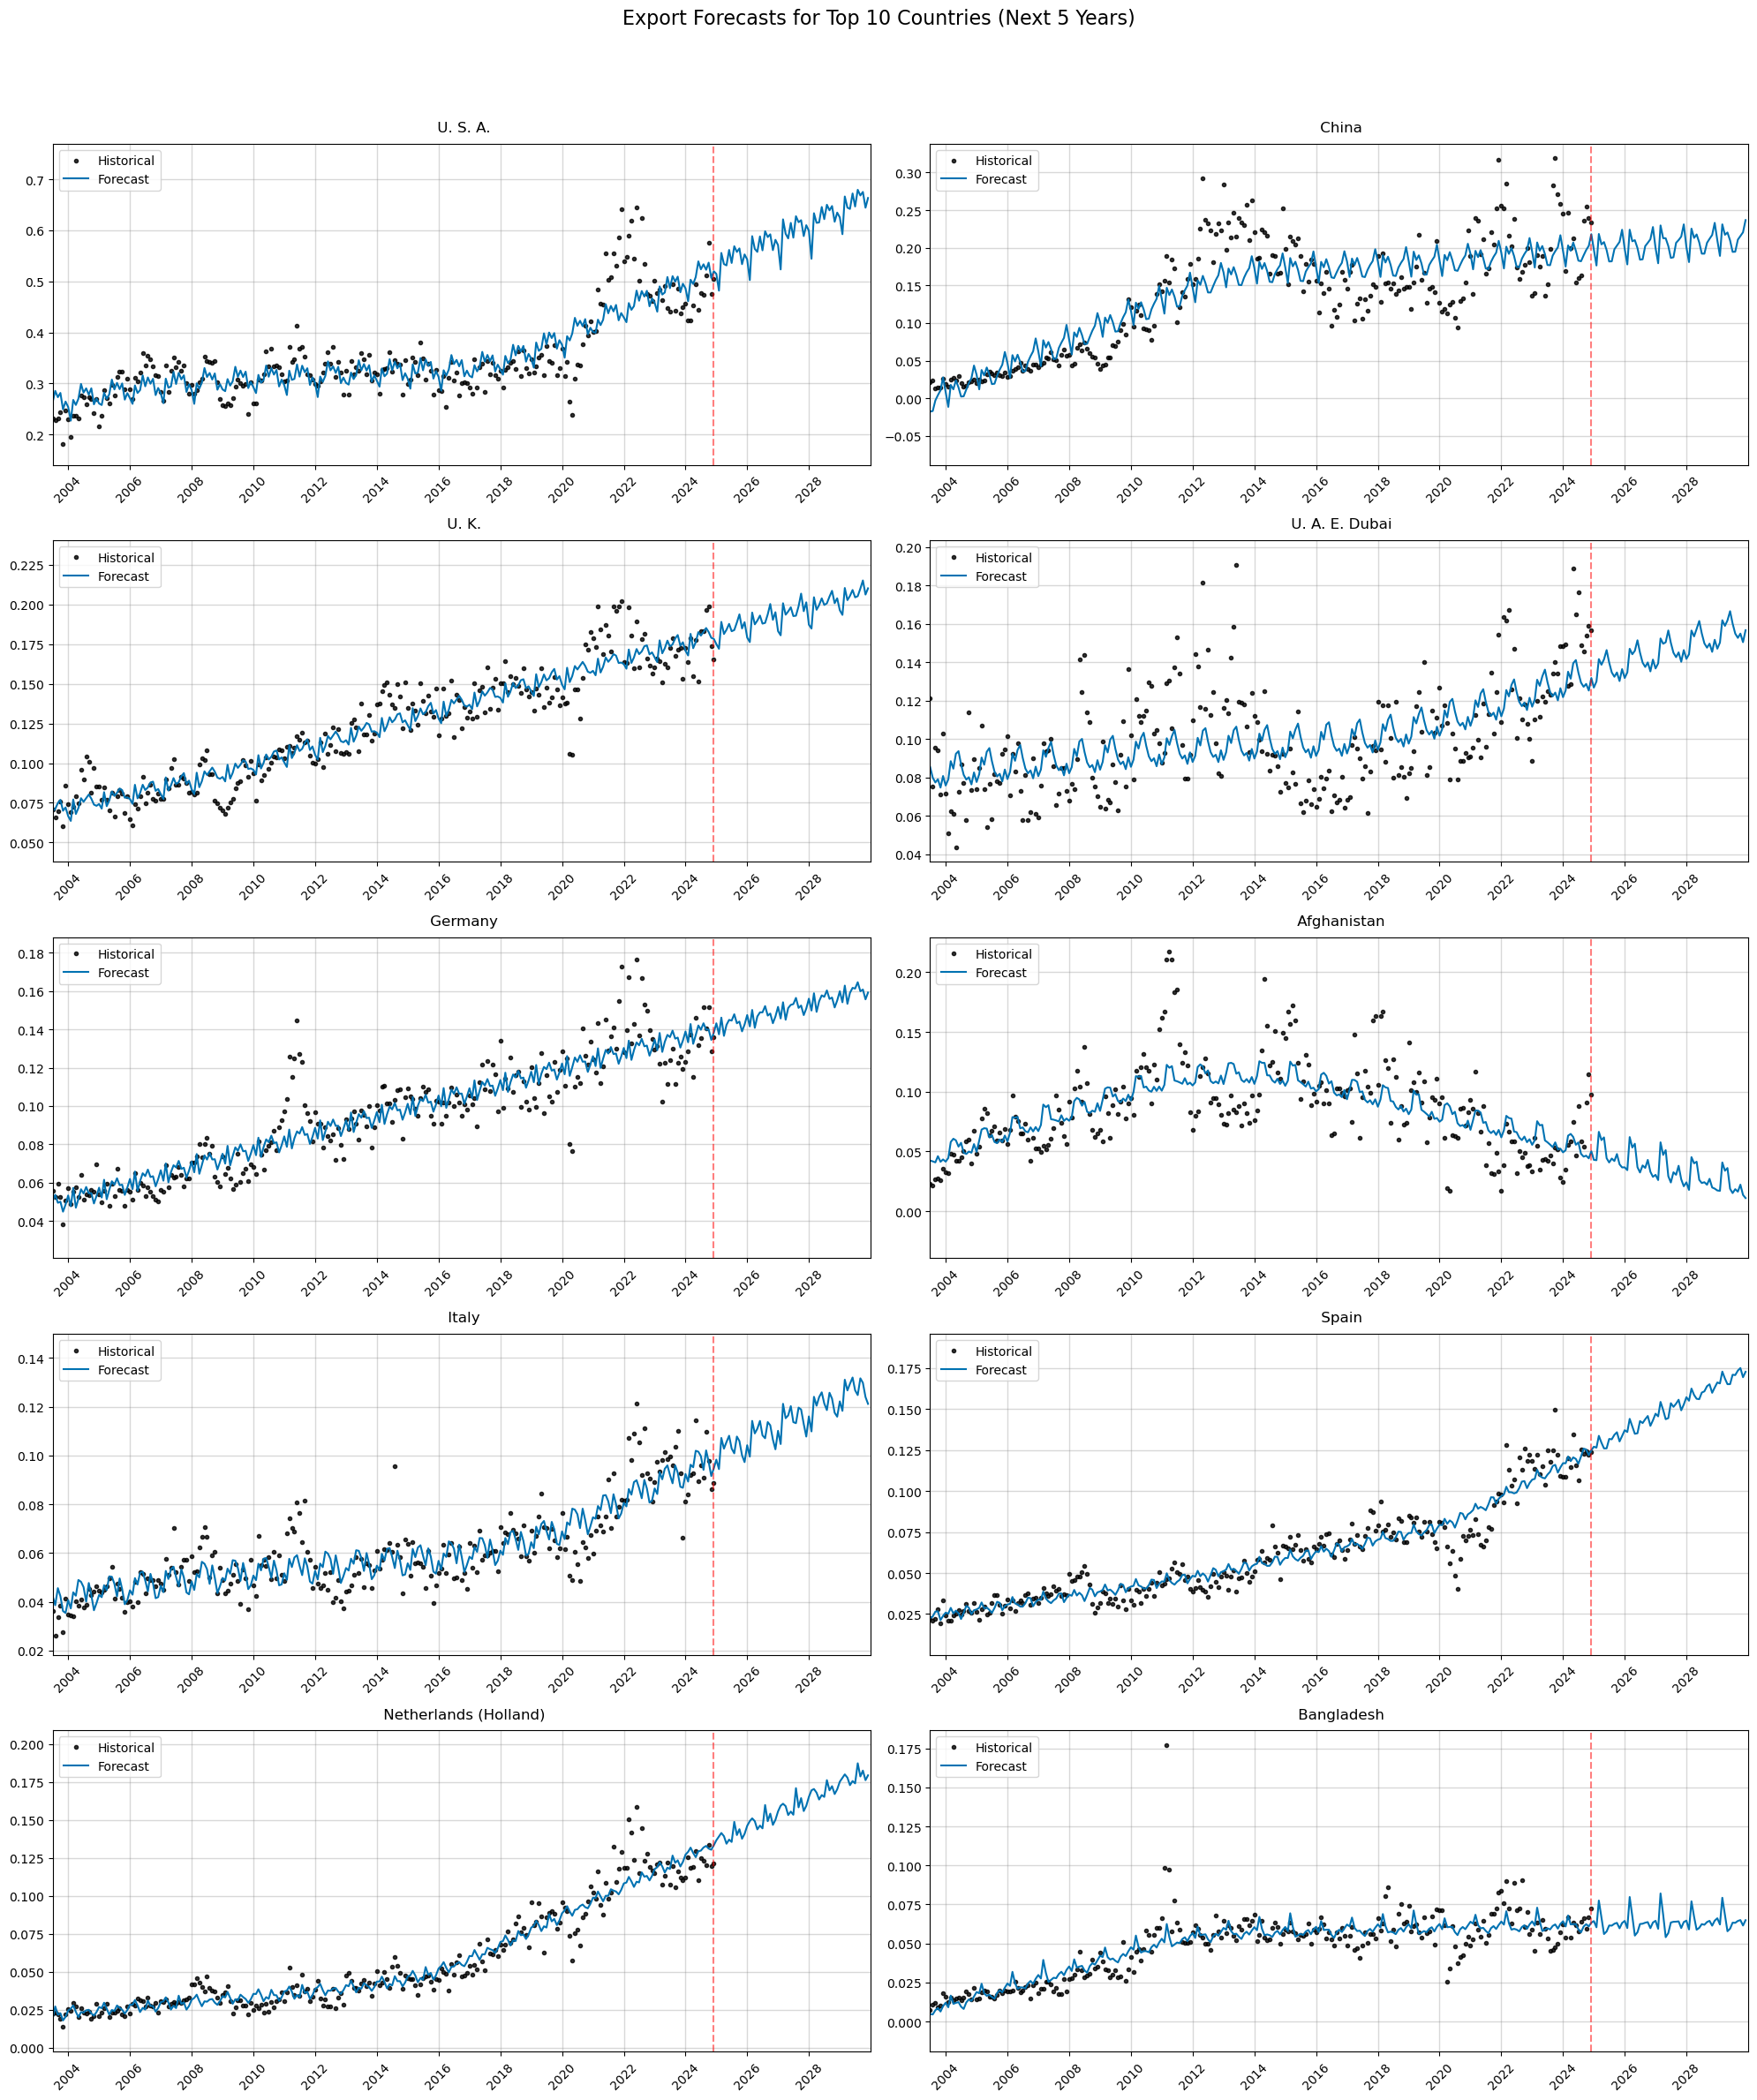

In [45]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime

# Create a dictionary to store forecasts
forecasts = {}

# Set up the dashboard
fig, axs = plt.subplots(5, 2, figsize=(20, 25))
fig.suptitle('Export Forecasts for Top 10 Countries (Next 5 Years)', fontsize=16)
axs = axs.flatten()

for i, country in enumerate(top_10_countries_list):
    country_data = df_monthly_exports[df_monthly_exports['Series Display Name'] == country].copy()
    
    # Convert 'ds' column to datetime64 if it's in PeriodDtype
    if isinstance(country_data['ds'].dtype, pd.PeriodDtype):
        country_data['ds'] = country_data['ds'].dt.to_timestamp()
    else:
        country_data['ds'] = pd.to_datetime(country_data['ds'])

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(country_data[['ds', 'y']])

    # Create future dataframe (next 5 years, monthly)
    future = model.make_future_dataframe(periods=60, freq='M')
    
    # Predict the future data
    forecast = model.predict(future)
    
    # Store the forecast in the dictionary
    forecasts[country] = forecast
    
    # Plot the forecast for the specific country
    ax = axs[i]
    model.plot(forecast, ax=ax, xlabel='', ylabel='')
    ax.set_title(f"{country}", fontsize=12, pad=10)
    
    # Set x-axis limits to show historical and future data
    future_years = pd.date_range(start='2025-01-01', end='2029-12-31', freq='Y')
    historical_years = pd.date_range(start=country_data['ds'].min(), end='2024-12-31', freq='Y')
    
    # Combine all years for x-axis ticks
    all_years = historical_years.append(future_years)
    
    # Format x-axis
    ax.xaxis.set_major_locator(mdates.YearLocator(2))  # Show every 2 years
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    # Set the x-axis range explicitly
    ax.set_xlim(country_data['ds'].min(), pd.Timestamp('2029-12-31'))
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)
    
    # Add vertical line to separate historical and forecast data
    current_date = country_data['ds'].max()
    ax.axvline(x=current_date, color='r', linestyle='--', alpha=0.5)
    
    # Remove the Prophet uncertainty interval
    ax.lines[0].set_alpha(0.8)  # Historical data
    ax.lines[1].set_alpha(1)    # Forecast
    ax.collections[0].set_alpha(0)  # Remove uncertainty interval
    
    # Add gridlines
    ax.grid(True, alpha=0.3)
    
    # Add legend
    ax.legend(['Historical', 'Forecast'], loc='upper left')

# Adjust layout to prevent label cutoff
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Optionally, save the figure
# plt.savefig('top_10_countries_forecast_dashboard.png', dpi=300, bbox_inches='tight')



# Export Forecasts with Trend Lines

This code visualizes the export forecasts for the top 10 countries with historical data, future forecasts, uncertainty intervals, and trend lines.

## Key Steps:
1. **Data Preprocessing**: 
   - Convert the `ds` column to datetime format.
   - Filter and plot historical export data for each country.

2. **Forecasting**:
   - Plot forecast data along with 95% confidence intervals using **Prophet**.

3. **Trend Line**:
   - Add a polynomial trend line (degree 2) to each country’s historical export data.

4. **Plot Customization**:
   - Format the x-axis for years, add gridlines, legends, and a vertical line separating historical data from forecast.
   - Add a footnote explaining the shaded area and trend line.

5. **Final Layout**:
   - Adjust layout to avoid overlaps and display the plot.

This creates a dashboard with clear insights into export trends for the top 10 countries.


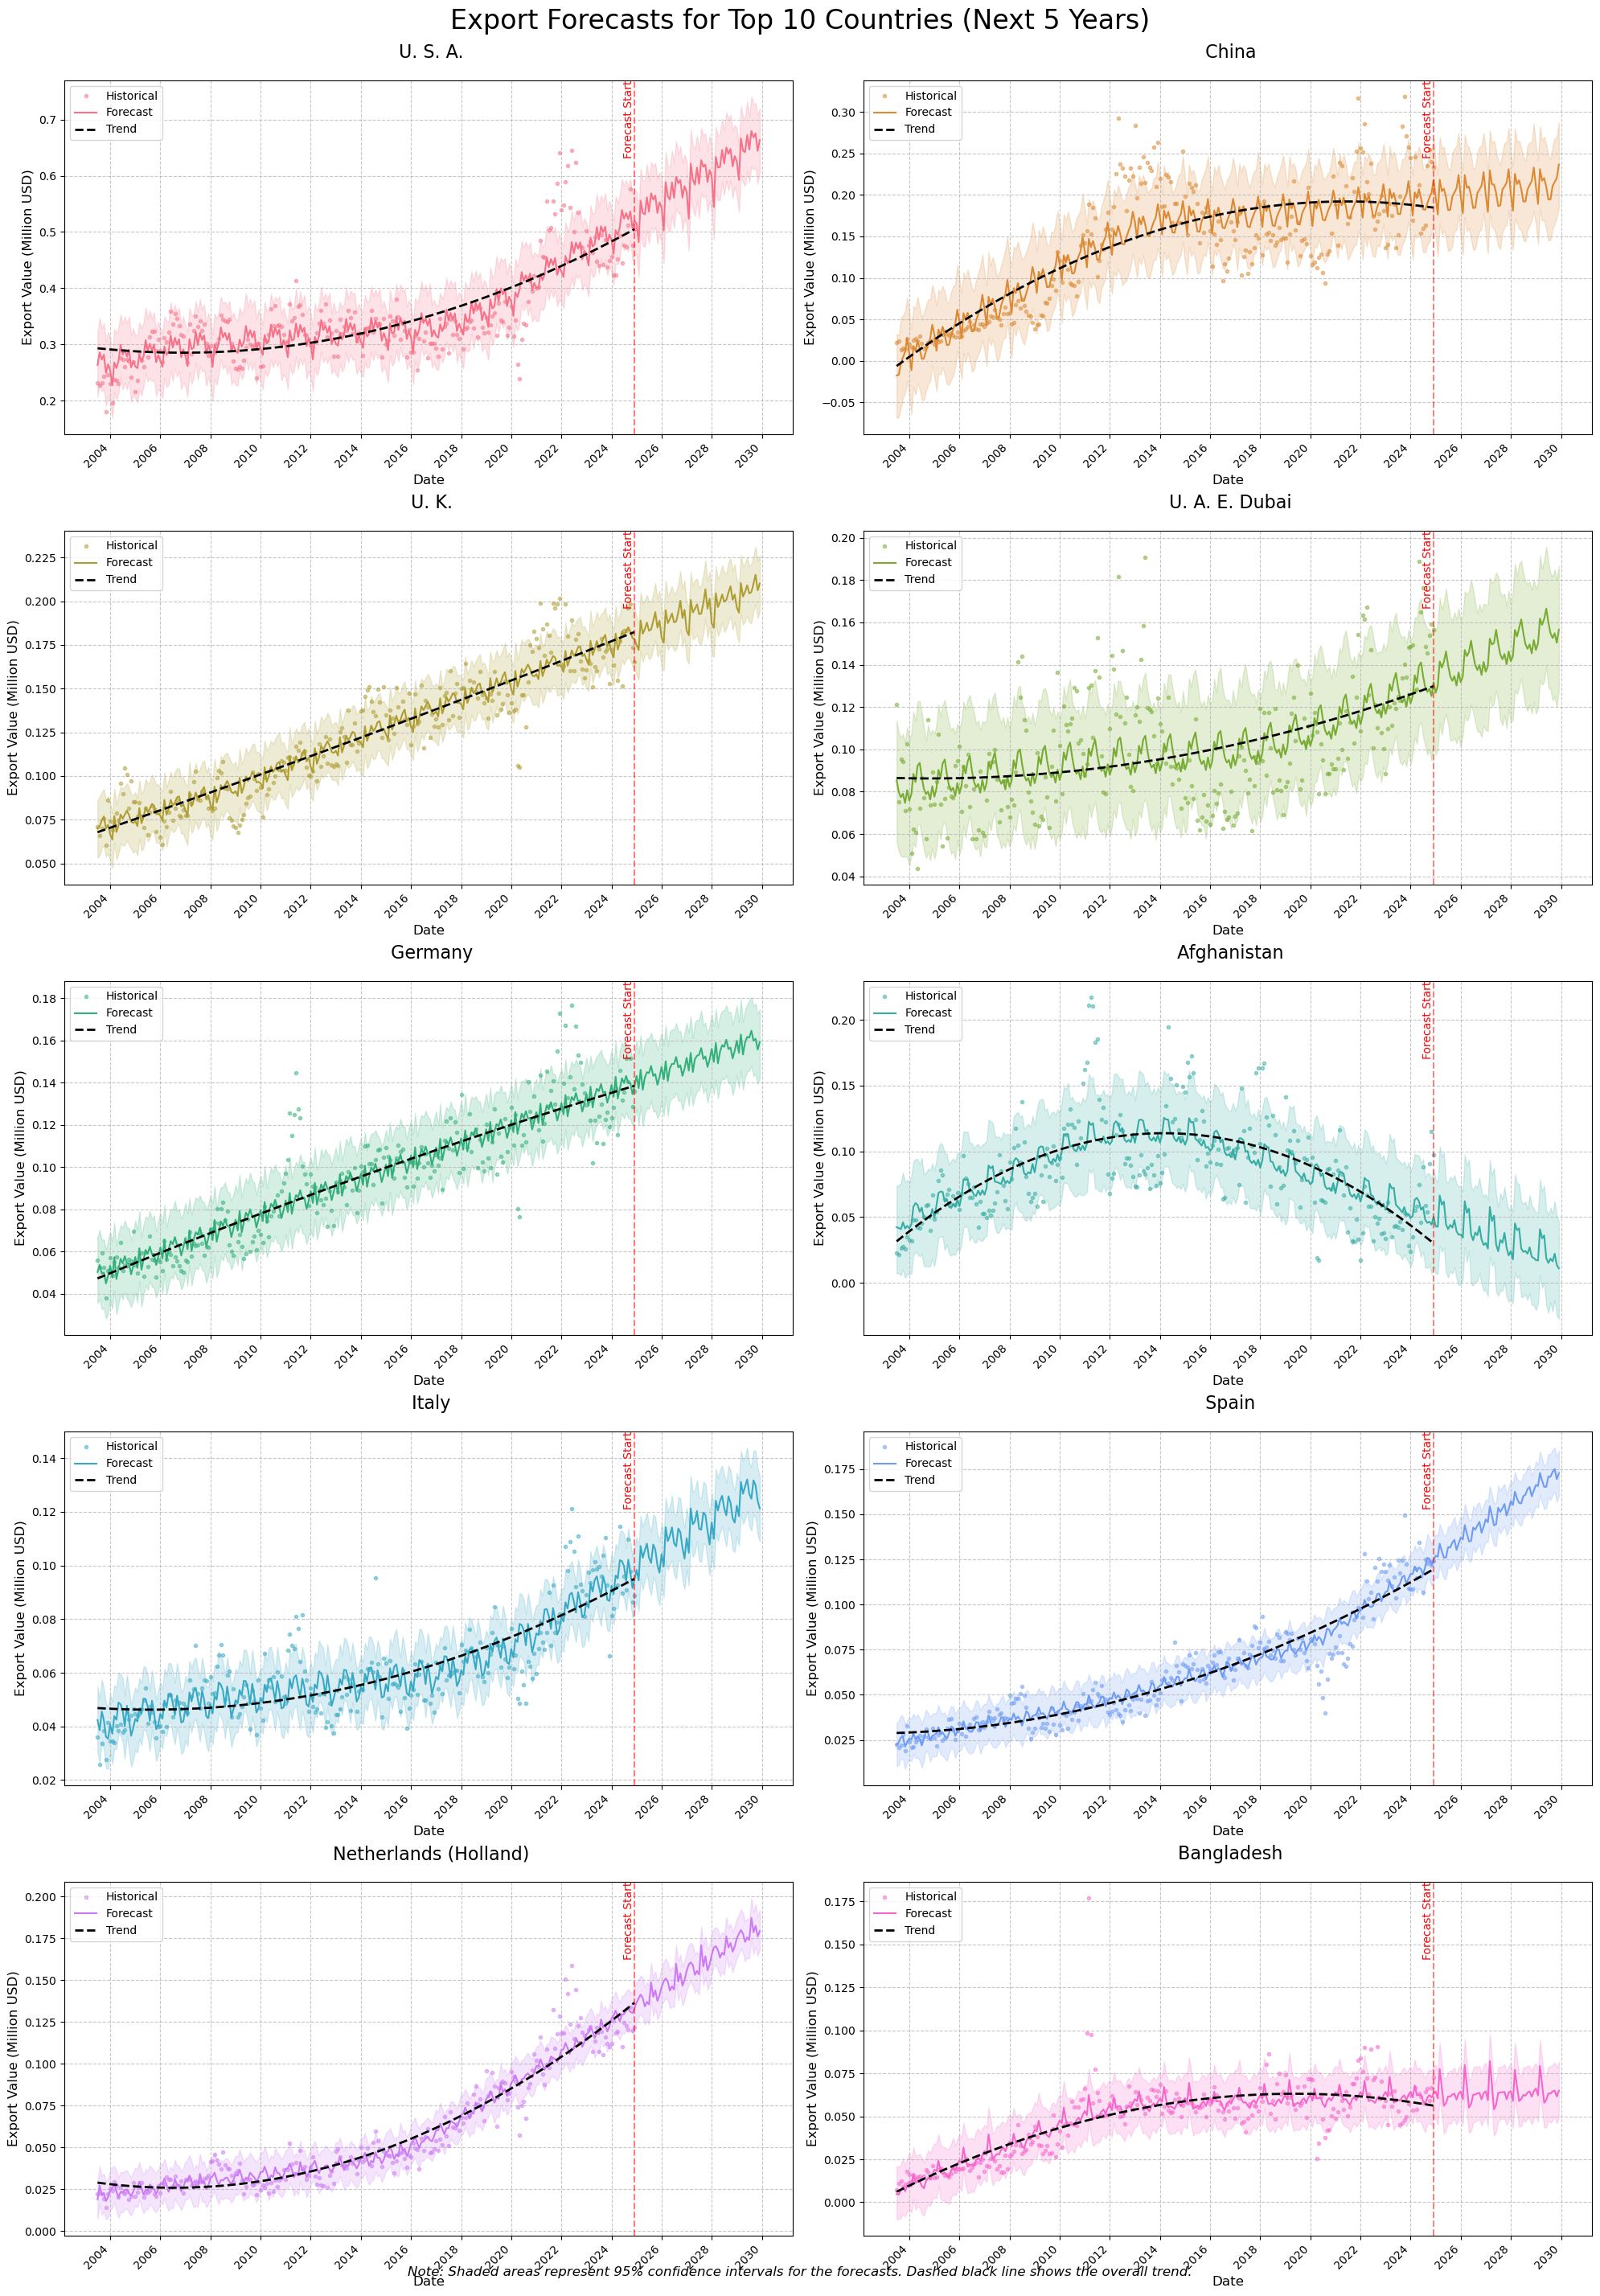

<Figure size 640x480 with 0 Axes>

In [46]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from prophet import Prophet
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import linregress



# Set up the color palette
colors = sns.color_palette("husl", len(forecasts))
color_dict = dict(zip(forecasts.keys(), colors))

# Set up the dashboard
fig, axs = plt.subplots(5, 2, figsize=(20, 30))
fig.suptitle('Export Forecasts for Top 10 Countries (Next 5 Years)', fontsize=24, y=0.95)
axs = axs.flatten()

def add_trend_line(ax, x, y, color):
    # Convert dates to numbers
    x_num = mdates.date2num(x)
    
    # Fit a polynomial of degree 2
    z = np.polyfit(x_num, y, 2)
    p = np.poly1d(z)
    
    # Plot the trend line
    ax.plot(x, p(x_num), '--', color=color, linewidth=2, label='Trend')

# Plotting for each forecasted country
for i, (country, forecast_data) in enumerate(forecasts.items()):
    ax = axs[i]
    
    # Retrieve the original data for this country
    country_data = df_monthly_exports[df_monthly_exports['Series Display Name'] == country].copy()
    
    # Convert 'ds' column to datetime64 if it's in PeriodDtype
    if isinstance(country_data['ds'].dtype, pd.PeriodDtype):
        country_data['ds'] = country_data['ds'].dt.to_timestamp()
    else:
        country_data['ds'] = pd.to_datetime(country_data['ds'])
    
    # Plot historical data
    ax.plot(country_data['ds'], country_data['y'], '.', color=color_dict[country], alpha=0.5, label='Historical')
    
    # Plot forecast
    ax.plot(forecast_data['ds'], forecast_data['yhat'], '-', color=color_dict[country], label='Forecast')
    
    # Plot uncertainty interval
    ax.fill_between(forecast_data['ds'], forecast_data['yhat_lower'], forecast_data['yhat_upper'], 
                    color=color_dict[country], alpha=0.2)
    
    # Add trend line
    add_trend_line(ax, country_data['ds'], country_data['y'], color='black')
    
    # Customize the plot
    ax.set_title(country, fontsize=16, pad=20)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Export Value (Million USD)', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Format x-axis
    ax.xaxis.set_major_locator(mdates.YearLocator(2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    # Rotate and align the tick labels so they look better
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # Add legend
    ax.legend(loc='upper left', frameon=True)
    
    # Add a vertical line to separate historical data and forecast
    last_historical_date = country_data['ds'].max()
    ax.axvline(x=last_historical_date, color='red', linestyle='--', alpha=0.5)
    ax.text(last_historical_date, ax.get_ylim()[1], 'Forecast Start', 
            rotation=90, verticalalignment='top', horizontalalignment='right', 
            color='red', fontsize=10)

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(top=0.92)

# Add a footnote
plt.figtext(0.5, 0.01, 'Note: Shaded areas represent 95% confidence intervals for the forecasts. Dashed black line shows the overall trend.', 
            ha='center', fontsize=12, style='italic')

# Show the plot
plt.show()


#plt.savefig('export_forecast_dashboard_with_trend.png', dpi=300, bbox_inches='tight')



## Validating my model 


In [49]:
from prophet.diagnostics import cross_validation, performance_metrics
import numpy as np

# Define horizon (forecast period) and cutoffs
horizon = '365 days'  # 1-year horizon for validation
initial = '1095 days'  # Use at least 3 years of initial data
period = '180 days'  # Step size for validation

# Dictionary to store model accuracy results for each country
accuracy_results = {}

for country in top_10_countries_list:
    print(f"Validating model for {country}...")
    
    # Get country-specific data
    country_data = df_monthly_exports[df_monthly_exports['Series Display Name'] == country].copy()
    
    # Convert 'ds' from Period to Timestamp
    country_data['ds'] = country_data['ds'].dt.to_timestamp()

    # Train Prophet model
    model = Prophet()
    model.fit(country_data[['ds', 'y']])

    # Perform cross-validation
    df_cv = cross_validation(model, initial=initial, period=period, horizon=horizon)
    
    # Compute performance metrics
    df_performance = performance_metrics(df_cv)
    
    # Store key metrics
    accuracy_results[country] = {
        "MAE": df_performance['mae'].mean(),
        "RMSE": df_performance['rmse'].mean(),
        "MAPE": df_performance['mape'].mean()
    }

# Convert results to DataFrame
accuracy_df = pd.DataFrame(accuracy_results).T
accuracy_df.sort_values(by="MAPE", ascending=True, inplace=True)  # Sort by best performance

# Display accuracy results
print("\nModel Accuracy (Lower is better):")
print(accuracy_df)

# Optionally, save results to CSV
accuracy_df.to_csv("prophet_model_accuracy.csv", index=True)


Validating model for  U. S. A....


01:27:18 - cmdstanpy - INFO - Chain [1] start processing
01:27:18 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/36 [00:00<?, ?it/s]

01:27:18 - cmdstanpy - INFO - Chain [1] start processing
01:27:19 - cmdstanpy - INFO - Chain [1] done processing
01:27:20 - cmdstanpy - INFO - Chain [1] start processing
01:27:21 - cmdstanpy - INFO - Chain [1] done processing
01:27:21 - cmdstanpy - INFO - Chain [1] start processing
01:27:22 - cmdstanpy - INFO - Chain [1] done processing
01:27:23 - cmdstanpy - INFO - Chain [1] start processing
01:27:24 - cmdstanpy - INFO - Chain [1] done processing
01:27:24 - cmdstanpy - INFO - Chain [1] start processing
01:27:25 - cmdstanpy - INFO - Chain [1] done processing
01:27:25 - cmdstanpy - INFO - Chain [1] start processing
01:27:26 - cmdstanpy - INFO - Chain [1] done processing
01:27:27 - cmdstanpy - INFO - Chain [1] start processing
01:27:27 - cmdstanpy - INFO - Chain [1] done processing
01:27:28 - cmdstanpy - INFO - Chain [1] start processing
01:27:29 - cmdstanpy - INFO - Chain [1] done processing
01:27:30 - cmdstanpy - INFO - Chain [1] start processing
01:27:31 - cmdstanpy - INFO - Chain [1]

Validating model for  China...


01:27:56 - cmdstanpy - INFO - Chain [1] start processing
01:27:56 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/36 [00:00<?, ?it/s]

01:27:56 - cmdstanpy - INFO - Chain [1] start processing
01:27:57 - cmdstanpy - INFO - Chain [1] done processing
01:27:57 - cmdstanpy - INFO - Chain [1] start processing
01:27:58 - cmdstanpy - INFO - Chain [1] done processing
01:27:58 - cmdstanpy - INFO - Chain [1] start processing
01:27:59 - cmdstanpy - INFO - Chain [1] done processing
01:27:59 - cmdstanpy - INFO - Chain [1] start processing
01:28:00 - cmdstanpy - INFO - Chain [1] done processing
01:28:00 - cmdstanpy - INFO - Chain [1] start processing
01:28:01 - cmdstanpy - INFO - Chain [1] done processing
01:28:02 - cmdstanpy - INFO - Chain [1] start processing
01:28:03 - cmdstanpy - INFO - Chain [1] done processing
01:28:03 - cmdstanpy - INFO - Chain [1] start processing
01:28:04 - cmdstanpy - INFO - Chain [1] done processing
01:28:05 - cmdstanpy - INFO - Chain [1] start processing
01:28:05 - cmdstanpy - INFO - Chain [1] done processing
01:28:06 - cmdstanpy - INFO - Chain [1] start processing
01:28:06 - cmdstanpy - INFO - Chain [1]

Validating model for  U. K....


01:28:28 - cmdstanpy - INFO - Chain [1] start processing
01:28:28 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/36 [00:00<?, ?it/s]

01:28:29 - cmdstanpy - INFO - Chain [1] start processing
01:28:30 - cmdstanpy - INFO - Chain [1] done processing
01:28:30 - cmdstanpy - INFO - Chain [1] start processing
01:28:31 - cmdstanpy - INFO - Chain [1] done processing
01:28:31 - cmdstanpy - INFO - Chain [1] start processing
01:28:32 - cmdstanpy - INFO - Chain [1] done processing
01:28:32 - cmdstanpy - INFO - Chain [1] start processing
01:28:32 - cmdstanpy - INFO - Chain [1] done processing
01:28:33 - cmdstanpy - INFO - Chain [1] start processing
01:28:33 - cmdstanpy - INFO - Chain [1] done processing
01:28:34 - cmdstanpy - INFO - Chain [1] start processing
01:28:35 - cmdstanpy - INFO - Chain [1] done processing
01:28:35 - cmdstanpy - INFO - Chain [1] start processing
01:28:36 - cmdstanpy - INFO - Chain [1] done processing
01:28:36 - cmdstanpy - INFO - Chain [1] start processing
01:28:36 - cmdstanpy - INFO - Chain [1] done processing
01:28:37 - cmdstanpy - INFO - Chain [1] start processing
01:28:38 - cmdstanpy - INFO - Chain [1]

Validating model for  U. A. E. Dubai...


01:28:57 - cmdstanpy - INFO - Chain [1] start processing
01:28:58 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/36 [00:00<?, ?it/s]

01:28:58 - cmdstanpy - INFO - Chain [1] start processing
01:28:58 - cmdstanpy - INFO - Chain [1] done processing
01:28:59 - cmdstanpy - INFO - Chain [1] start processing
01:28:59 - cmdstanpy - INFO - Chain [1] done processing
01:29:00 - cmdstanpy - INFO - Chain [1] start processing
01:29:00 - cmdstanpy - INFO - Chain [1] done processing
01:29:00 - cmdstanpy - INFO - Chain [1] start processing
01:29:01 - cmdstanpy - INFO - Chain [1] done processing
01:29:01 - cmdstanpy - INFO - Chain [1] start processing
01:29:02 - cmdstanpy - INFO - Chain [1] done processing
01:29:02 - cmdstanpy - INFO - Chain [1] start processing
01:29:03 - cmdstanpy - INFO - Chain [1] done processing
01:29:03 - cmdstanpy - INFO - Chain [1] start processing
01:29:04 - cmdstanpy - INFO - Chain [1] done processing
01:29:04 - cmdstanpy - INFO - Chain [1] start processing
01:29:05 - cmdstanpy - INFO - Chain [1] done processing
01:29:05 - cmdstanpy - INFO - Chain [1] start processing
01:29:06 - cmdstanpy - INFO - Chain [1]

Validating model for  Germany...


01:29:25 - cmdstanpy - INFO - Chain [1] start processing
01:29:25 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/36 [00:00<?, ?it/s]

01:29:25 - cmdstanpy - INFO - Chain [1] start processing
01:29:26 - cmdstanpy - INFO - Chain [1] done processing
01:29:26 - cmdstanpy - INFO - Chain [1] start processing
01:29:27 - cmdstanpy - INFO - Chain [1] done processing
01:29:27 - cmdstanpy - INFO - Chain [1] start processing
01:29:28 - cmdstanpy - INFO - Chain [1] done processing
01:29:28 - cmdstanpy - INFO - Chain [1] start processing
01:29:29 - cmdstanpy - INFO - Chain [1] done processing
01:29:29 - cmdstanpy - INFO - Chain [1] start processing
01:29:30 - cmdstanpy - INFO - Chain [1] done processing
01:29:30 - cmdstanpy - INFO - Chain [1] start processing
01:29:31 - cmdstanpy - INFO - Chain [1] done processing
01:29:32 - cmdstanpy - INFO - Chain [1] start processing
01:29:33 - cmdstanpy - INFO - Chain [1] done processing
01:29:33 - cmdstanpy - INFO - Chain [1] start processing
01:29:34 - cmdstanpy - INFO - Chain [1] done processing
01:29:34 - cmdstanpy - INFO - Chain [1] start processing
01:29:35 - cmdstanpy - INFO - Chain [1]

Validating model for  Afghanistan...


01:29:56 - cmdstanpy - INFO - Chain [1] start processing
01:29:57 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/36 [00:00<?, ?it/s]

01:29:57 - cmdstanpy - INFO - Chain [1] start processing
01:29:58 - cmdstanpy - INFO - Chain [1] done processing
01:29:58 - cmdstanpy - INFO - Chain [1] start processing
01:30:00 - cmdstanpy - INFO - Chain [1] done processing
01:30:00 - cmdstanpy - INFO - Chain [1] start processing
01:30:01 - cmdstanpy - INFO - Chain [1] done processing
01:30:01 - cmdstanpy - INFO - Chain [1] start processing
01:30:02 - cmdstanpy - INFO - Chain [1] done processing
01:30:02 - cmdstanpy - INFO - Chain [1] start processing
01:30:04 - cmdstanpy - INFO - Chain [1] done processing
01:30:04 - cmdstanpy - INFO - Chain [1] start processing
01:30:05 - cmdstanpy - INFO - Chain [1] done processing
01:30:05 - cmdstanpy - INFO - Chain [1] start processing
01:30:06 - cmdstanpy - INFO - Chain [1] done processing
01:30:07 - cmdstanpy - INFO - Chain [1] start processing
01:30:07 - cmdstanpy - INFO - Chain [1] done processing
01:30:07 - cmdstanpy - INFO - Chain [1] start processing
01:30:08 - cmdstanpy - INFO - Chain [1]

Validating model for  Italy...


01:30:29 - cmdstanpy - INFO - Chain [1] start processing
01:30:29 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/36 [00:00<?, ?it/s]

01:30:30 - cmdstanpy - INFO - Chain [1] start processing
01:30:30 - cmdstanpy - INFO - Chain [1] done processing
01:30:31 - cmdstanpy - INFO - Chain [1] start processing
01:30:32 - cmdstanpy - INFO - Chain [1] done processing
01:30:32 - cmdstanpy - INFO - Chain [1] start processing
01:30:33 - cmdstanpy - INFO - Chain [1] done processing
01:30:33 - cmdstanpy - INFO - Chain [1] start processing
01:30:34 - cmdstanpy - INFO - Chain [1] done processing
01:30:34 - cmdstanpy - INFO - Chain [1] start processing
01:30:35 - cmdstanpy - INFO - Chain [1] done processing
01:30:35 - cmdstanpy - INFO - Chain [1] start processing
01:30:36 - cmdstanpy - INFO - Chain [1] done processing
01:30:36 - cmdstanpy - INFO - Chain [1] start processing
01:30:37 - cmdstanpy - INFO - Chain [1] done processing
01:30:37 - cmdstanpy - INFO - Chain [1] start processing
01:30:38 - cmdstanpy - INFO - Chain [1] done processing
01:30:38 - cmdstanpy - INFO - Chain [1] start processing
01:30:39 - cmdstanpy - INFO - Chain [1]

Validating model for  Spain...


01:31:06 - cmdstanpy - INFO - Chain [1] start processing
01:31:06 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/36 [00:00<?, ?it/s]

01:31:07 - cmdstanpy - INFO - Chain [1] start processing
01:31:07 - cmdstanpy - INFO - Chain [1] done processing
01:31:08 - cmdstanpy - INFO - Chain [1] start processing
01:31:08 - cmdstanpy - INFO - Chain [1] done processing
01:31:09 - cmdstanpy - INFO - Chain [1] start processing
01:31:09 - cmdstanpy - INFO - Chain [1] done processing
01:31:10 - cmdstanpy - INFO - Chain [1] start processing
01:31:10 - cmdstanpy - INFO - Chain [1] done processing
01:31:11 - cmdstanpy - INFO - Chain [1] start processing
01:31:12 - cmdstanpy - INFO - Chain [1] done processing
01:31:12 - cmdstanpy - INFO - Chain [1] start processing
01:31:14 - cmdstanpy - INFO - Chain [1] done processing
01:31:14 - cmdstanpy - INFO - Chain [1] start processing
01:31:15 - cmdstanpy - INFO - Chain [1] done processing
01:31:16 - cmdstanpy - INFO - Chain [1] start processing
01:31:16 - cmdstanpy - INFO - Chain [1] done processing
01:31:17 - cmdstanpy - INFO - Chain [1] start processing
01:31:18 - cmdstanpy - INFO - Chain [1]

Validating model for  Netherlands (Holland)...


01:31:40 - cmdstanpy - INFO - Chain [1] start processing
01:31:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/36 [00:00<?, ?it/s]

01:31:40 - cmdstanpy - INFO - Chain [1] start processing
01:31:41 - cmdstanpy - INFO - Chain [1] done processing
01:31:41 - cmdstanpy - INFO - Chain [1] start processing
01:31:42 - cmdstanpy - INFO - Chain [1] done processing
01:31:42 - cmdstanpy - INFO - Chain [1] start processing
01:31:42 - cmdstanpy - INFO - Chain [1] done processing
01:31:43 - cmdstanpy - INFO - Chain [1] start processing
01:31:43 - cmdstanpy - INFO - Chain [1] done processing
01:31:44 - cmdstanpy - INFO - Chain [1] start processing
01:31:45 - cmdstanpy - INFO - Chain [1] done processing
01:31:45 - cmdstanpy - INFO - Chain [1] start processing
01:31:46 - cmdstanpy - INFO - Chain [1] done processing
01:31:46 - cmdstanpy - INFO - Chain [1] start processing
01:31:47 - cmdstanpy - INFO - Chain [1] done processing
01:31:47 - cmdstanpy - INFO - Chain [1] start processing
01:31:48 - cmdstanpy - INFO - Chain [1] done processing
01:31:48 - cmdstanpy - INFO - Chain [1] start processing
01:31:49 - cmdstanpy - INFO - Chain [1]

Validating model for  Bangladesh...


01:32:11 - cmdstanpy - INFO - Chain [1] start processing
01:32:11 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/36 [00:00<?, ?it/s]

01:32:12 - cmdstanpy - INFO - Chain [1] start processing
01:32:12 - cmdstanpy - INFO - Chain [1] done processing
01:32:12 - cmdstanpy - INFO - Chain [1] start processing
01:32:13 - cmdstanpy - INFO - Chain [1] done processing
01:32:13 - cmdstanpy - INFO - Chain [1] start processing
01:32:14 - cmdstanpy - INFO - Chain [1] done processing
01:32:14 - cmdstanpy - INFO - Chain [1] start processing
01:32:15 - cmdstanpy - INFO - Chain [1] done processing
01:32:15 - cmdstanpy - INFO - Chain [1] start processing
01:32:16 - cmdstanpy - INFO - Chain [1] done processing
01:32:16 - cmdstanpy - INFO - Chain [1] start processing
01:32:17 - cmdstanpy - INFO - Chain [1] done processing
01:32:17 - cmdstanpy - INFO - Chain [1] start processing
01:32:18 - cmdstanpy - INFO - Chain [1] done processing
01:32:18 - cmdstanpy - INFO - Chain [1] start processing
01:32:19 - cmdstanpy - INFO - Chain [1] done processing
01:32:19 - cmdstanpy - INFO - Chain [1] start processing
01:32:20 - cmdstanpy - INFO - Chain [1]


Model Accuracy (Lower is better):
                             MAE      RMSE      MAPE
 U. K.                  0.012791  0.016075  0.101151
 U. S. A.               0.045977  0.064823  0.117723
 Germany                0.013487  0.018019  0.138177
 Italy                  0.009689  0.012500  0.153920
 Spain                  0.010248  0.013853  0.165444
 Netherlands (Holland)  0.009895  0.012783  0.175170
 Bangladesh             0.011393  0.015764  0.214785
 U. A. E. Dubai         0.023556  0.029260  0.230019
 China                  0.039421  0.052052  0.241012
 Afghanistan            0.031243  0.039213  0.445129


### Model Accuracy Report

This report presents the forecast model's performance for the top 10 countries, evaluated using three key metrics: MAE (Mean Absolute Error), RMSE (Root Mean Squared Error), and MAPE (Mean Absolute Percentage Error). Lower values of these metrics indicate better model accuracy.

#### Key Metrics:
- **MAE (Mean Absolute Error)**: The average of the absolute differences between the forecasted and actual values.
- **RMSE (Root Mean Squared Error)**: The square root of the average of squared errors, highlighting larger errors more than smaller ones.
- **MAPE (Mean Absolute Percentage Error)**: The average of the absolute percentage errors between the forecasted and actual values.

#### Summary:
- **Best Performance**: The **U.K.** has the lowest values for MAE, RMSE, and MAPE, indicating the most accurate forecast model among the countries.
- **Worst Performance**: **Afghanistan** shows the highest error values, particularly in MAPE, suggesting the model's predictions for this country are less reliable.
- **Other Notable Performances**: Countries like **Italy**, **Netherlands (Holland)**,  **Germany**,**USA** have relatively low error metrics, indicating good model accuracy.

In conclusion, the model performs best for the **U.K.**, while improvements are needed for **Afghanistan** 




In [75]:
# Calculate overall model accuracy
overall_mae = accuracy_df['MAE'].mean()
overall_rmse = accuracy_df['RMSE'].mean()
overall_mape = accuracy_df['MAPE'].mean()

# Print overall accuracy results
print("\nOverall Model Accuracy (Lower is better):")
print(f"Overall MAE: {overall_mae:.4f}")
print(f"Overall RMSE: {overall_rmse:.4f}")
print(f"Overall MAPE: {overall_mape:.4f}")


Overall Model Accuracy (Lower is better):
Overall MAE: 0.0208
Overall RMSE: 0.0274
Overall MAPE: 0.1983


60
